In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Clean Data_2.csv')

In [3]:
df.head()

Unnamed: 0  Age  Number of sexual partners  First sexual intercourse  \
0           0   18                        4.0                      15.0   
1           1   15                        1.0                      14.0   
2           2   34                        1.0                      17.0   
3           3   52                        5.0                      16.0   
4           4   46                        3.0                      21.0   

   Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                 1.0     0.0             0.0                  0.0   
1                 1.0     0.0             0.0                  0.0   
2                 1.0     0.0             0.0                  0.0   
3                 4.0     1.0            37.0                 37.0   
4                 4.0     0.0             0.0                  0.0   

   Hormonal Contraceptives  Hormonal Contraceptives (years)  ...  STDs:HIV  \
0                      0.0                              0.0  ...       0.0   
1                      0.0                              0.0  ...       0.0   
2                      0.0                              0.0  ...       0.0   
3                      1.0                              3.0  ...       0.0   
4                      1.0                             15.0  ...       0.0   

   STDs: Number of diagnosis  Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Hinselmann  \
0                          0          0       0       0   0           0   
1                          0          0       0       0   0           0   
2                          0          0       0       0   0           0   
3                          0          1       0       1   0           0   
4                          0          0       0       0   0           0   

   Schiller  Citology  Biopsy  
0         0         0       0  
1         0         0       0  
2         0         0       0  
3         0         0       0  
4         0         0       0  

[5 rows x 25 columns]

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
from sklearn.model_selection import train_test_split

In [28]:
X = df.drop(['Hinselmann','Schiller','Citology','Biopsy'],axis=1)
y = df['Biopsy']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [36]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=8, scoring='accuracy')
print(scores)

[0.91666667 0.86111111 0.93055556 0.875      0.875      0.87323944
 0.85915493 0.85915493]


In [37]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
predictions = model.predict(X_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.8798586572438163


              precision    recall  f1-score   support

           0       0.94      0.94      0.94       263
           1       0.15      0.15      0.15        20

    accuracy                           0.88       283
   macro avg       0.54      0.54      0.54       283
weighted avg       0.88      0.88      0.88       283



[[246  17]
 [ 17   3]]


In [40]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [41]:
X.shape

(856, 20)

In [42]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_

array([0.20817014, 0.11852851, 0.1436675 , 0.11080689, 0.0158904 ,
       0.03480875, 0.03102922, 0.02288683, 0.15549144, 0.01586814,
       0.03131009, 0.00995439, 0.01071881, 0.00485025, 0.01586444,
       0.01322892, 0.01415098, 0.00961833, 0.01576966, 0.0173863 ])

In [43]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)

In [44]:
feat_importances

Age                                0.208170
Number of sexual partners          0.118529
First sexual intercourse           0.143667
Num of pregnancies                 0.110807
Smokes                             0.015890
Smokes (years)                     0.034809
Smokes (packs/year)                0.031029
Hormonal Contraceptives            0.022887
Hormonal Contraceptives (years)    0.155491
IUD                                0.015868
IUD (years)                        0.031310
STDs                               0.009954
STDs:condylomatosis                0.010719
STDs:syphilis                      0.004850
STDs:HIV                           0.015864
STDs: Number of diagnosis          0.013229
Dx:Cancer                          0.014151
Dx:CIN                             0.009618
Dx:HPV                             0.015770
Dx                                 0.017386
dtype: float64

<AxesSubplot:>

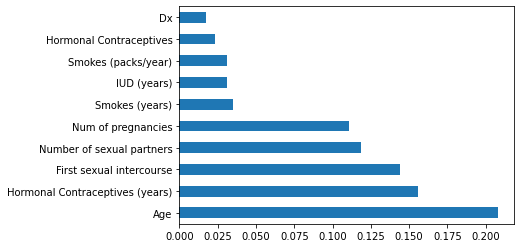

In [45]:
feat_importances.nlargest(10).plot(kind='barh')

In [46]:
model = SelectFromModel(clf, prefit=True)

In [47]:
X_new = model.transform(X)

In [48]:
X_new.shape

(856, 5)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=101)

In [50]:
new_model = DecisionTreeClassifier()

In [51]:
new_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
predictions = new_model.predict(X_test)

In [53]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.8763250883392226


              precision    recall  f1-score   support

           0       0.95      0.92      0.93       263
           1       0.24      0.35      0.29        20

    accuracy                           0.88       283
   macro avg       0.60      0.63      0.61       283
weighted avg       0.90      0.88      0.89       283



[[241  22]
 [ 13   7]]


In [58]:
import xgboost as xgb

In [59]:
xgb_cl = xgb.XGBClassifier()

In [60]:
xgb_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [61]:
predictions = xgb_cl.predict(X_test)

In [62]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.9045936395759717


              precision    recall  f1-score   support

           0       0.93      0.97      0.95       263
           1       0.18      0.10      0.13        20

    accuracy                           0.90       283
   macro avg       0.56      0.53      0.54       283
weighted avg       0.88      0.90      0.89       283



[[254   9]
 [ 18   2]]
